# APRIORI In Grocery Store

Followed from [Ekrem Bayar](https://www.kaggle.com/ekrembayar/apriori-association-rules-grocery-store/data) about association rule learning

*Association rule learning* is a rule-based machine learning method for discovering interesting relations between variables in large databases. Identify strong rules discovered in databases using some measures of interestingness

**Term in Association Rules**

1. Support : Indication how frequently the itemset appears in the datasets
2. Confidence : Indication how often the rule has been found to be true
3. Lift : Ratio of the observed support to the expected if X and Y were independent
4. Conviction : Ratio of the expected frequency that X occurs without Y
5. Leverage : Measurement of the difference of X and Y appearing together in the dataset and what would be expected if X and Y where statistically dependent.

## 1. Import Module

In [2]:
# !pip install mlxtend

# Base
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np

# Transaction encoder
from mlxtend.preprocessing import TransactionEncoder

# APRIORI Function
from mlxtend.frequent_patterns import apriori, association_rules

# itertools
import itertools

# Configuration
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

## 2. Data

In [5]:
df = pd.read_csv('GroceryStoreDataSet.csv', names=['products'], header=None)

In [6]:
df

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [7]:
df.shape

(20, 1)

## 3. Tidy Data for Association Rules

In [8]:
data = list(df['products'].apply(lambda x:x.split(',')))

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data, columns = te.columns_).astype(int)

In [9]:
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


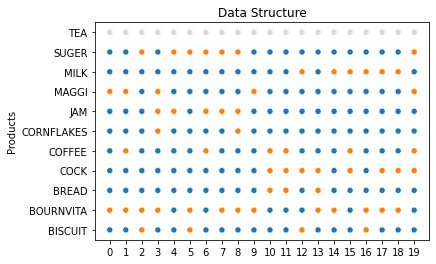

In [10]:
p = df.copy()
for i in range(1, len(p.columns)+1):
    p['Cat'] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]] = i
    g = sns.scatterplot(p.index, p[p.columns[i]], hue=p.Cat, legend=False)
    g.yaxis.set_label_text("Products")
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(df.index)
    g.set_yticklabels(df.columns)
    plt.title('Data Structure')

## 4. Step by Step

**(First Iteration)**

Finding support values for each product

n: 20 (df.shape[0])

In [11]:
# Find the frequency of Items
df.sum()

BISCUIT        7
BOURNVITA      4
BREAD         13
COCK           3
COFFEE         8
CORNFLAKES     6
JAM            2
MAGGI          5
MILK           5
SUGER          6
TEA            7
dtype: int64

In [12]:
# Product frequency / total sales
first = pd.DataFrame(df.sum() / df.shape[0], columns=['Support']).sort_values("Support", ascending=False)

In [13]:
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


In [14]:
# Eliminating low support
first[first.Support >= 0.15]

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


**(Second Iteration)**

Find support for pair product combinations

In [15]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]

In [17]:
# Example combination
second[:10]

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COCK'],
 ['BREAD', 'JAM']]

In [18]:
# Find support values
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum()
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
    
# Creating dataframe
second_iteration = pd.DataFrame(value, columns = ['Support'])
second_iteration['index'] = [tuple(i) for i in second]
second_iteration['length'] = second_iteration['index'].apply(lambda x:len(x))
second_iteration = second_iteration.set_index("index").sort_values("Support", ascending=False)

# Eliminating support value
second_iteration = second_iteration[second_iteration.Support > 0.1]
second_iteration

,Support,length
index,,
"(TEA, MAGGI)",0.20,2
"(BREAD, TEA)",0.20,2
"(BREAD, SUGER)",0.20,2
"(BREAD, MILK)",0.20,2
"(BREAD, BISCUIT)",0.20,2
"(COFFEE, CORNFLAKES)",0.20,2
"(COFFEE, SUGER)",0.20,2
"(BREAD, COFFEE)",0.15,2
"(BREAD, MAGGI)",0.15,2


## 5. Function

In [20]:
def aprior_iter(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Next Iteration
    def aprior_calculate(iterationIndex = iterationIndex):
        # Calculating support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum()
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        
        # Bind results
        result = pd.DataFrame(value, columns = ['Support'])
        result['index'] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index('index').sort_values('Support', ascending=False)
        
        # Eliminating the support value
        result = result[result.Support > support_value]
        return result
    
    # First Iteration
    first = pd.DataFrame(df.T.sum(axis = 1) / df.shape[0], columns=['Support']).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first['length'] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = aprior_calculate(second)
        
    # All Iteration > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = aprior_calculate(nth)

    return res

In [21]:
iteration1 = aprior_iter(df, num_iter=1, support_value=0.1)
iteration1

,Support,length
BREAD,0.65,1
COFFEE,0.40,1
BISCUIT,0.35,1
TEA,0.35,1
CORNFLAKES,0.30,1
SUGER,0.30,1
MAGGI,0.25,1
MILK,0.25,1
BOURNVITA,0.20,1
COCK,0.15,1


In [22]:
iteration2 = aprior_iter(df, num_iter=2, support_value=0.1)
iteration2

,Support,length
index,,
"(COFFEE, CORNFLAKES)",0.20,2
"(BREAD, TEA)",0.20,2
"(TEA, MAGGI)",0.20,2
"(BREAD, SUGER)",0.20,2
"(BREAD, BISCUIT)",0.20,2
"(BREAD, MILK)",0.20,2
"(COFFEE, SUGER)",0.20,2
"(BREAD, COFFEE)",0.15,2
"(COFFEE, COCK)",0.15,2


In [26]:
iteration3 = aprior_iter(df, num_iter=3, support_value=0.01,
                         iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(MAGGI, BREAD, TEA)",0.10,3
"(MILK, BREAD, BISCUIT)",0.10,3
"(CORNFLAKES, BISCUIT, COCK)",0.10,3
"(COFFEE, BISCUIT, COCK)",0.10,3
"(BREAD, BOURNVITA, TEA)",0.10,3
"(CORNFLAKES, COFFEE, BISCUIT)",0.10,3
"(BREAD, COFFEE, SUGER)",0.10,3
"(CORNFLAKES, COFFEE, COCK)",0.10,3
"(MAGGI, BISCUIT, TEA)",0.10,3


In [27]:
iteration4 = aprior_iter(df, num_iter=4, support_value=0.01, 
                         iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(CORNFLAKES, BISCUIT, COCK, COFFEE)",0.10,4
"(CORNFLAKES, MILK, COFFEE, TEA)",0.05,4
"(CORNFLAKES, MILK, BREAD, BISCUIT)",0.05,4
"(MAGGI, BREAD, BISCUIT, TEA)",0.05,4


## 6. Association Rules

* apriori() function --> Evaluate support vlauue for each product
* association_rules() function --> Understanding the relationship between antecedents and consequences products

In [28]:
# APRIORI
freq_items = apriori(df, min_support=0.1, use_colnames=True, verbose=1)
freq_items.sort_values("support", ascending=False)

Processing 108 combinations | Sampling itemset size 4


,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
9,0.30,(SUGER)
7,0.25,(MAGGI)
8,0.25,(MILK)
30,0.20,"(COFFEE, SUGER)"
34,0.20,"(MAGGI, TEA)"


In [29]:
freq_items.sort_values("support", ascending=False).head(5)

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)


In [30]:
freq_items.sort_values("support", ascending=False).tail(5)

,support,itemsets
15,0.10,"(BISCUIT, MAGGI)"
16,0.10,"(BISCUIT, MILK)"
17,0.10,"(BISCUIT, TEA)"
22,0.10,"(BREAD, JAM)"
45,0.10,"(BISCUIT, COCK, COFFEE, CORNFLAKES)"


In [31]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric="confidence", min_threshold=0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
1,(COCK),(BISCUIT),0.15,0.35,0.10,0.67,1.90,0.05,1.95
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.50,1.43,0.04,1.30
3,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.75,1.15,0.02,1.40
4,(BOURNVITA),(SUGER),0.20,0.30,0.10,0.50,1.67,0.04,1.40
...,...,...,...,...,...,...,...,...,...
61,"(BISCUIT, CORNFLAKES)","(COCK, COFFEE)",0.15,0.15,0.10,0.67,4.44,0.08,2.55
62,"(COCK, COFFEE)","(BISCUIT, CORNFLAKES)",0.15,0.15,0.10,0.67,4.44,0.08,2.55
63,"(COCK, CORNFLAKES)","(BISCUIT, COFFEE)",0.10,0.10,0.10,1.00,10.00,0.09,inf
64,"(COFFEE, CORNFLAKES)","(BISCUIT, COCK)",0.20,0.10,0.10,0.50,5.00,0.08,1.80


In [33]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(MILK),(BREAD),0.25,0.65,0.20,0.80,1.23,0.04,1.75
18,(MAGGI),(TEA),0.25,0.35,0.20,0.80,2.29,0.11,3.25
9,(SUGER),(BREAD),0.30,0.65,0.20,0.67,1.03,0.01,1.05
14,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80
16,(SUGER),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
10,(TEA),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
19,(TEA),(MAGGI),0.35,0.25,0.20,0.57,2.29,0.11,1.75


## 7. Mini Conclusion

So from the output above, we can think that whenever buyer buy milk, they probably will take the bread 0.65, because the probability buyer take milk only is 0.25 and so on